# Useful Code Snippets - Olympic Dataset Visualisation and Exploration

In this notebook, we open and explore a number of different datafiles relating to the Olympic games since 1896.

For your Streamlit exercise, you can copy any of the visualisations below to use in the exercise, or use them as a starting point to make your own. 

## Imports

In [8]:
import pandas as pd
import geopandas
import folium
import plotly.express as px
import matplotlib.pyplot as plt


## Tables and Graphs: Medals per country by year

Within this, there's the opportunity for you to add filters by year or country. 

First, this code reads in the data and displays the first few rows.

In [9]:
medals_per_country_per_year = pd.read_csv("medals_per_country_per_year.csv")
medals_per_country_per_year.head()

Year    Country  NOC  Bronze  Silver  Gold  Total
0  1896  Australia  AUS     1.0     0.0   2.0    3.0
1  1896    Austria  AUT     2.0     1.0   2.0    5.0
2  1896    Denmark  DEN     3.0     2.0   1.0    6.0
3  1896     France  FRA     2.0     4.0   5.0   11.0
4  1896    Germany  GER     2.0     5.0   7.0   14.0

We could sort the data like this - we pass in the column we want to sort by, and whether it should sort in ascending order (smallest value at the top). If we don't pass in `ascending=True` or `ascending=False`, it will default to `True` and put the smallest value at the top of the table, which we don't want here as the higher number of medals is more interesting!. 

In [10]:
medals_per_country_per_year.sort_values("Total", ascending=False)

Year      Country  NOC  Bronze  Silver  Gold  Total
45   1904          USA  USA    75.0    79.0  76.0  230.0
611  1980       Russia  URS    46.0    69.0  80.0  195.0
665  1984          USA  USA    30.0    61.0  82.0  173.0
81   1908           UK  GBR    37.0    50.0  56.0  143.0
707  1988       Russia  URS    46.0    31.0  54.0  131.0
..    ...          ...  ...     ...     ...   ...    ...
363  1956  Switzerland  SUI     1.0     0.0   0.0    1.0
367  1956      Uruguay  URU     1.0     0.0   0.0    1.0
640  1984  Ivory Coast  CIV     0.0     1.0   0.0    1.0
638  1984      Ireland  IRL     0.0     1.0   0.0    1.0
411  1964    Argentina  ARG     0.0     1.0   0.0    1.0

[1271 rows x 7 columns]

We can see that the year with the highest performance by any team was the USA in 1904.

Let's try sorting by multiple fields. This first sorts by Gold (in ascending order), then by the total number of medals if there was a tie (in ascending order).

Note that our dataset only contains rows where at least one medal was won by the country in the year. 

In [11]:
medals_per_country_per_year.sort_values(["Gold", "Total"], ascending=True)

Year     Country  NOC  Bronze  Silver  Gold  Total
14   1900    Colombia  COL     0.0     1.0   0.0    1.0
25   1900      Mexico  MEX     1.0     0.0   0.0    1.0
65   1908     Austria  AUT     1.0     0.0   0.0    1.0
111  1920      Greece  GRE     0.0     1.0   0.0    1.0
114  1920  Luxembourg  LUX     0.0     1.0   0.0    1.0
..    ...         ...  ...     ...     ...   ...    ...
707  1988      Russia  URS    46.0    31.0  54.0  131.0
81   1908          UK  GBR    37.0    50.0  56.0  143.0
45   1904         USA  USA    75.0    79.0  76.0  230.0
611  1980      Russia  URS    46.0    69.0  80.0  195.0
665  1984         USA  USA    30.0    61.0  82.0  173.0

[1271 rows x 7 columns]

Let's create a simple line chart of a single column. We'll colour the lines by the country.

In [12]:
px.line(medals_per_country_per_year, x="Year", y="Bronze", color="Country")

This is a good starting point, but it looks a bit busy! What could we do about this?

First, let's now limit this to a single country.

Think about how you might get the `chosen_country` variable using Streamlit.

In [13]:
chosen_country = "UK"

px.line(medals_per_country_per_year[medals_per_country_per_year["Country"] == chosen_country],
        y="Bronze", x="Year")

It would be nice to be able to display the bronze, silver, gold and total medals for a single country on a single graph. 

So we can pass in the medal colour to the 'colour' field of plotly express, we want to turn our dataset into a **long** format. 

This means there will be one row per medal type, per country, per year. 

The `melt` method allows us to do this. We pass in a list of the columns we want to remain unchanged to `id_vars`, and then the remaining columns will be manipulated into the long format. 

In [14]:
medals_per_country_per_year_long = medals_per_country_per_year.melt(id_vars=["Year", "Country", "NOC"])
medals_per_country_per_year_long

Year               Country  NOC variable  value
0     1896             Australia  AUS   Bronze    1.0
1     1896               Austria  AUT   Bronze    2.0
2     1896               Denmark  DEN   Bronze    3.0
3     1896                France  FRA   Bronze    2.0
4     1896               Germany  GER   Bronze    2.0
...    ...                   ...  ...      ...    ...
5079  2016               Ukraine  UKR    Total   11.0
5080  2016  United Arab Emirates  UAE    Total    1.0
5081  2016            Uzbekistan  UZB    Total   13.0
5082  2016             Venezuela  VEN    Total    3.0
5083  2016               Vietnam  VIE    Total    2.0

[5084 rows x 5 columns]

We can now pass in the 'variable' column (which has been automatically named that) to the 'color' parameter, and our y becomes 'value' instead of a single medal type. 

In [47]:
px.line(medals_per_country_per_year_long[medals_per_country_per_year_long["Country"] == chosen_country],
        y="value", x="Year", color="variable",
        color_discrete_sequence=["orange", "silver", "gold", "blue"])

We could also do some different charts, like the total number of medals over all time by country. 

In [16]:
total_medals_all_time = (
    medals_per_country_per_year.drop(columns=["Year", "NOC"])
    .groupby('Country').sum()
    .reset_index()
    .sort_values('Total', ascending=False)
    )

total_medals_all_time

Country  Bronze  Silver    Gold   Total
123         USA   707.0   802.0  1035.0  2544.0
98       Russia   487.0   498.0   592.0  1577.0
41      Germany   490.0   457.0   442.0  1389.0
122          UK   298.0   316.0   278.0   892.0
38       France   282.0   255.0   233.0   770.0
..          ...     ...     ...     ...     ...
64       Kosovo     0.0     0.0     1.0     1.0
71    Macedonia     1.0     0.0     0.0     1.0
73    Mauritius     1.0     0.0     0.0     1.0
78   Montenegro     0.0     1.0     0.0     1.0
39        Gabon     0.0     1.0     0.0     1.0

[134 rows x 5 columns]

Let's choose a certain number of rows to display. 

In [17]:
rows_to_display = 10

px.bar(total_medals_all_time.head(rows_to_display), x='Country', y='Total',
       title=f"Total Number of Medals since 1896 - Top {rows_to_display} Countries")

By making this a 'long' dataset again using melt, we could make a stacked bar chart. 

In [18]:
total_medals_all_time_long = total_medals_all_time.drop(columns='Total').melt(id_vars="Country")
total_medals_all_time_long

Country variable  value
0           USA   Bronze  707.0
1        Russia   Bronze  487.0
2       Germany   Bronze  490.0
3            UK   Bronze  298.0
4        France   Bronze  282.0
..          ...      ...    ...
397      Kosovo     Gold    1.0
398   Macedonia     Gold    0.0
399   Mauritius     Gold    0.0
400  Montenegro     Gold    0.0
401       Gabon     Gold    0.0

[402 rows x 3 columns]

In [46]:
px.bar(total_medals_all_time_long, x="Country", y="value", color="variable", color_discrete_sequence=["orange", "silver", "gold"])

In [20]:
total_medals_all_time_long['Total'] = total_medals_all_time_long['value'].groupby(total_medals_all_time_long['Country']).transform('sum')
total_medals_all_time_long['Percentage of Total'] = total_medals_all_time_long['value'] / total_medals_all_time_long['Total']
total_medals_all_time_long.head()

Country variable  value   Total  Percentage of Total
0      USA   Bronze  707.0  2544.0             0.277909
1   Russia   Bronze  487.0  1577.0             0.308814
2  Germany   Bronze  490.0  1389.0             0.352772
3       UK   Bronze  298.0   892.0             0.334081
4   France   Bronze  282.0   770.0             0.366234

In [21]:
px.bar(total_medals_all_time_long[total_medals_all_time_long['Country'].isin(total_medals_all_time_long.head(rows_to_display)['Country'].values)],
       x="Country", y="Percentage of Total", color="variable",
       color_discrete_sequence=["orange", "silver", "gold"],
       title=f"Breakdown of Medals by type - Top {rows_to_display} countries by total all-time medal count")

# Maps - Number of medals by location

In [22]:
country_outlines = geopandas.read_file("countries_outlines.geojson")
country_outlines.head()

id                  name  \
0  AFG           Afghanistan   
1  AGO                Angola   
2  ALB               Albania   
3  ARE  United Arab Emirates   
4  ARG             Argentina   

                                            geometry  
0  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  
1  MULTIPOLYGON (((16.32653 -5.87747, 16.57318 -6...  
2  POLYGON ((20.59025 41.8554, 20.46318 41.51509,...  
3  POLYGON ((51.57952 24.2455, 51.75744 24.29407,...  
4  MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6...

In [23]:
medals_per_country_per_year_gdf = pd.concat([
    pd.merge(country_outlines, medals_per_country_per_year, left_on="id", right_on="NOC", how="inner"),
    pd.merge(country_outlines, medals_per_country_per_year, left_on="name", right_on="Country", how="inner")
]).drop_duplicates()

medals_per_country_per_year_gdf.head()

id         name                                           geometry  Year  \
0  AFG  Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  2008   
1  AFG  Afghanistan  POLYGON ((61.21082 35.65007, 62.23065 35.27066...  2012   
2  ARG    Argentina  MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6...  1924   
3  ARG    Argentina  MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6...  1928   
4  ARG    Argentina  MULTIPOLYGON (((-65.5 -55.2, -66.45 -55.25, -6...  1932   

       Country  NOC  Bronze  Silver  Gold  Total  
0  Afghanistan  AFG     1.0     0.0   0.0    1.0  
1  Afghanistan  AFG     1.0     0.0   0.0    1.0  
2    Argentina  ARG     2.0     3.0   1.0    6.0  
3    Argentina  ARG     1.0     3.0   3.0    7.0  
4    Argentina  ARG     0.0     1.0   3.0    4.0

In [24]:
selected_year = 2012
selected_medal_type="Bronze"

Text(0.5, 1.0, 'Number of Bronze Medals in 2012')

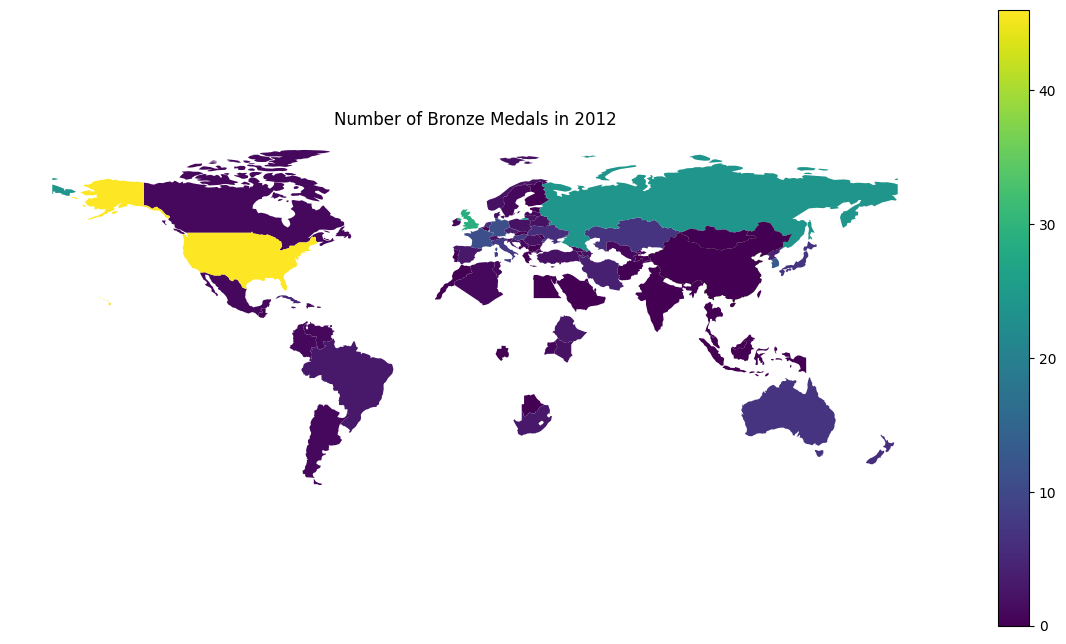

In [25]:
fig, ax = plt.subplots(figsize=(15, 8))
ax = medals_per_country_per_year_gdf[medals_per_country_per_year_gdf["Year"] == selected_year].plot(
    "Gold", legend=True, ax=ax
    )
ax.axis('off')
plt.title(f"Number of {selected_medal_type} Medals in {selected_year}")

Here's an alternative with an interactive map.

In [26]:
#create base map
world_map_medals = folium.Map(
    location=[50.71671, -3.50668],
    zoom_start=2,
    tiles='cartodbpositron'
    )

# create and add choropleth map
choropleth = folium.Choropleth(
    geo_data=medals_per_country_per_year_gdf[medals_per_country_per_year_gdf["Year"] == selected_year], # dataframe with geometry in it
    data=medals_per_country_per_year_gdf[medals_per_country_per_year_gdf["Year"] == selected_year], # dataframe with data in - may be the same dataframe or a different one
    columns=['name', 'Gold'], # [key (field for geometry), field to plot]
    key_on='feature.properties.Country'
    )

choropleth = choropleth.add_to(world_map_medals)

choropleth = choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(
        ['name', 'Gold'],
        labels=True
        )
)

world_map_medals


# Tables and Graphs - Athlete-level statistics

In [27]:
athlete_statistics = pd.read_csv("athlete_details_eventwise.csv")
athlete_statistics.head()

Name Sex   Age  Height  Weight      Country  NOC  Year  \
0      Ahmad Shah Abouwi   M   NaN     NaN     NaN  Afghanistan  AFG  1956   
1  Jammal-ud-Din Affendi   M  28.0     NaN     NaN  Afghanistan  AFG  1936   
2   Mohammad Anwar Afzal   M   NaN     NaN     NaN  Afghanistan  AFG  1948   
3         Mohammad Aktar   M  17.0   156.0    48.0  Afghanistan  AFG  1980   
4  Mohammad Daoud Anwary   M  22.0     NaN     NaN  Afghanistan  AFG  1964   

       Sport                                       Event Medal  
0     Hockey                         Hockey Men's Hockey   NaN  
1     Hockey                         Hockey Men's Hockey   NaN  
2   Football                     Football Men's Football   NaN  
3  Wrestling  Wrestling Men's Light-Flyweight, Freestyle   NaN  
4  Wrestling     Wrestling Men's Bantamweight, Freestyle   NaN

Let's look at the athlete who competed in the most events in a single year. 

In [28]:
most_events_per_year_by_athlete = athlete_statistics.value_counts(['Name', 'Country', 'Year']).reset_index()
most_events_per_year_by_athlete.head()

Name  Country  Year  count
0              Robert Tait McKenzie   Canada  1932     44
1  Alfrd (Arnold-) Hajs (Guttmann-)  Hungary  1928     28
2                   Miltiades Manno  Hungary  1932     27
3             Alfred James Munnings       UK  1948     25
4  Wilhelm (William) Hunt Diederich      USA  1932     19

We could pull out just the 

In [29]:
athlete_name_most_events = most_events_per_year_by_athlete.head(1)['Name'].values[0]
athlete_name_most_events_year = most_events_per_year_by_athlete.head(1)['Year'].values[0]

We could then feed that back in.

In [30]:
athlete_statistics[(athlete_statistics["Name"] == athlete_name_most_events) &
                    (athlete_statistics["Year"] == athlete_name_most_events_year)]

Name Sex   Age  Height  Weight Country  NOC  Year  \
32262  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32263  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32264  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32265  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32266  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32267  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32268  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32269  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32270  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32271  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32272  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32273  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32274  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32275  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32276  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32277  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32278  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32279  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32280  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32281  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32282  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32283  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32284  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32285  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32286  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32287  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32288  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32289  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32290  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32291  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32292  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32293  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32294  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32295  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32296  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32297  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32298  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32299  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32300  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32301  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32302  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32303  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32304  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   
32305  Robert Tait McKenzie   M  65.0     NaN     NaN  Canada  CAN  1932   

                  Sport                                              Event  \
32262  Art Competitions  Art Competitions Mixed Sculpturing, Medals And...   
32263  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
32264  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
32265  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
32266  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
32267  Art Competitions  Art Competitions Mixed Sculpturing, Unknown Event   
32268  Art Competitions  Art Competitions Mixed Sculptur

It seems like there might be some errors or odd data in here! 

Or we could just enter a single name in to find details about that athlete. How might you gather that in Streamlit?

In [31]:
chosen_athlete = "Simone Arianne Biles"

athlete_statistics[athlete_statistics["Name"] == chosen_athlete]

Name Sex   Age  Height  Weight Country  NOC  Year  \
203896  Simone Arianne Biles   F  19.0   143.0    47.0     USA  USA  2016   
203897  Simone Arianne Biles   F  19.0   143.0    47.0     USA  USA  2016   
203898  Simone Arianne Biles   F  19.0   143.0    47.0     USA  USA  2016   
203899  Simone Arianne Biles   F  19.0   143.0    47.0     USA  USA  2016   
203900  Simone Arianne Biles   F  19.0   143.0    47.0     USA  USA  2016   
203901  Simone Arianne Biles   F  19.0   143.0    47.0     USA  USA  2016   

             Sport                                     Event   Medal  
203896  Gymnastics  Gymnastics Women's Individual All-Around    Gold  
203897  Gymnastics        Gymnastics Women's Team All-Around    Gold  
203898  Gymnastics         Gymnastics Women's Floor Exercise    Gold  
203899  Gymnastics            Gymnastics Women's Horse Vault    Gold  
203900  Gymnastics            Gymnastics Women's Uneven Bars     NaN  
203901  Gymnastics           Gymnastics Women's Balance Beam  Bronze

Or we could do a slightly fuzzier match.

In [32]:
search_string = "Ben"

athlete_statistics[athlete_statistics["Name"].str.contains(search_string)]

Name Sex   Age  Height  Weight   Country  NOC  \
271               Benaissa Abed   M  23.0   170.0    51.0   Algeria  ALG   
327           Ben Ali Beghouach   M  21.0   186.0    89.0   Algeria  ALG   
328           Ben Ali Beghouach   M  29.0   186.0    89.0   Algeria  ALG   
348         Djillali Ben Brahim   M  27.0   178.0    71.0   Algeria  ALG   
349            Reda Ben Chehima   M  26.0   175.0    75.0   Algeria  ALG   
...                         ...  ..   ...     ...     ...       ...  ...   
219770  Lidija Benedeti-Lapajne   F  25.0   175.0    64.0    Serbia  YUG   
219771             Marijan Bene   M  25.0   170.0    68.0    Serbia  YUG   
221821           Benson Mulomba   M  22.0   177.0    54.0    Zambia  ZAM   
221843             Benny Muziyo   M  23.0     NaN     NaN    Zambia  ZAM   
222158     Gavin Ben Sutherland   M  37.0   186.0    78.0  Zimbabwe  ZIM   

        Year      Sport                            Event Medal  
271     1988     Boxing           Boxing Men's Flyweight   NaN  
327     1988   Handball          Handball Men's Handball   NaN  
328     1996   Handball          Handball Men's Handball   NaN  
348     1980       Judo           Judo Men's Lightweight   NaN  
349     2004    Fencing  Fencing Men's Sabre, Individual   NaN  
...      ...        ...                              ...   ...  
219770  1984  Athletics      Athletics Women's High Jump   NaN  
219771  1976     Boxing        Boxing Men's Welterweight   NaN  
221821  1972  Athletics       Athletics Men's 800 metres   NaN  
221843  2016     Boxing        Boxing Men's Middleweight   NaN  
222158  2016    Archery         Archery Men's Individual   NaN  

[1617 rows x 11 columns]

And who competed the most overall ever?

In [33]:
athlete_statistics.value_counts(['Name', 'Sex', 'Country']).reset_index()

Name Sex         Country  count
0                       Robert Tait McKenzie   M          Canada     58
1                   Heikki Ilmari Savolainen   M         Finland     39
2                      Joseph "Josy" Stoffel   M      Luxembourg     38
3                        Ioannis Theofilakis   M          Greece     36
4                                Takashi Ono   M           Japan     33
...                                      ...  ..             ...    ...
116737                          Jan Wijnants   M         Belgium      1
116738                          Jan Wallisch   M  Czech Republic      1
116739                          Jan Wagenaar   M     Netherlands      1
116740                             Jan Wadas   M          Poland      1
116741  Karen Rayr van der Veen (-Wilkinson)   F    South Africa      1

[116742 rows x 4 columns]

# Calculating parts of a whole

Let's get the distinct athletes who attended each year.

In [34]:
distinct_athletes_per_year = athlete_statistics[['Name', 'Year','Country','Sex', 'Age', 'Height', 'Weight']].drop_duplicates()
distinct_athletes_per_year

Name  Year      Country Sex   Age  Height  \
0                   Ahmad Shah Abouwi  1956  Afghanistan   M   NaN     NaN   
1               Jammal-ud-Din Affendi  1936  Afghanistan   M  28.0     NaN   
2                Mohammad Anwar Afzal  1948  Afghanistan   M   NaN     NaN   
3                      Mohammad Aktar  1980  Afghanistan   M  17.0   156.0   
4               Mohammad Daoud Anwary  1964  Afghanistan   M  22.0     NaN   
...                               ...   ...          ...  ..   ...     ...   
222196  Antonette Wilken (-Batchelor)  1984     Zimbabwe   F  23.0   162.0   
222197                 Hillary Wilson  1960     Zimbabwe   F  15.0   157.0   
222200            Peter Arthur Wilson  1980     Zimbabwe   M  20.0   185.0   
222201          Jennifer "Jenny" Wood  1964     Zimbabwe   F  16.0   172.0   
222202                  Lloyd Zvasiya  2004     Zimbabwe   M  23.0   190.0   

        Weight  
0          NaN  
1          NaN  
2          NaN  
3         48.0  
4          NaN  
...        ...  
222196    49.0  
222197    65.0  
222200    80.0  
222201    64.0  
222202    80.0  

[158636 rows x 7 columns]

In [35]:
athlete_counts_by_sex_by_year = distinct_athletes_per_year.value_counts(['Sex', 'Year']).reset_index()
athlete_counts_by_sex_by_year.head()

Sex  Year  count
0   M  1996   6813
1   M  1992   6652
2   M  2000   6571
3   M  2008   6279
4   M  2004   6251

Let's try to add in a count of the number of athletes per year. 

In [36]:
athlete_counts_by_sex_by_year['total_athletes_both_sex_in_year'] = athlete_counts_by_sex_by_year['count'].groupby(athlete_counts_by_sex_by_year['Year']).transform('sum')
athlete_counts_by_sex_by_year['Percentage of Athletes'] = athlete_counts_by_sex_by_year['count'] / athlete_counts_by_sex_by_year['total_athletes_both_sex_in_year']
athlete_counts_by_sex_by_year.head()

Sex  Year  count  total_athletes_both_sex_in_year  Percentage of Athletes
0   M  1996   6813                            10325                0.659855
1   M  1992   6652                             9372                0.709774
2   M  2000   6571                            10633                0.617982
3   M  2008   6279                            10874                0.577432
4   M  2004   6251                            10541                0.593018

In [37]:
px.bar(athlete_counts_by_sex_by_year,
       x="Year", y="Percentage of Athletes", color="Sex",
       title=f"Change in Gender Split Over Time")

## Event statistics

In [43]:
athlete_statistics[athlete_statistics["Year"] == selected_year][['Sport', 'Event']].drop_duplicates().reset_index(drop=True)

Sport                                Event
0        Athletics           Athletics Men's 100 metres
1        Taekwondo         Taekwondo Men's Welterweight
2           Boxing               Boxing Men's Flyweight
3             Judo          Judo Men's Half-Lightweight
4        Athletics         Athletics Women's 100 metres
..             ...                                  ...
297  Weightlifting     Weightlifting Men's Middleweight
298  Weightlifting      Weightlifting Women's Flyweight
299  Weightlifting    Weightlifting Men's Featherweight
300  Weightlifting  Weightlifting Women's Featherweight
301        Fencing           Fencing Women's Foil, Team

[302 rows x 2 columns]

In [45]:
athlete_statistics[athlete_statistics["Year"] == selected_year][['Sport', 'Event']].drop_duplicates().value_counts('Sport').reset_index()

Sport  count
0               Athletics     47
1                Swimming     34
2               Wrestling     18
3                 Cycling     18
4                Canoeing     16
5                Shooting     15
6           Weightlifting     15
7              Gymnastics     14
8                    Judo     14
9                  Rowing     14
10                 Boxing     13
11                Fencing     10
12                Sailing     10
13              Taekwondo      8
14                 Diving      8
15          Equestrianism      6
16                 Tennis      5
17              Badminton      5
18           Table Tennis      4
19                Archery      4
20    Rhythmic Gymnastics      2
21                 Hockey      2
22  Synchronized Swimming      2
23               Handball      2
24               Football      2
25       Beach Volleyball      2
26           Trampolining      2
27              Triathlon      2
28             Volleyball      2
29             Water Polo      2
30             Basketball      2
31      Modern Pentathlon      2